In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
covid_data = pd.read_csv("table.tsv", delimiter="\t")

In [30]:
covid_data.shape

(504, 19)

In [31]:
covid_data.head()

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
0,1,1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
1,2,2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
2,3,3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
3,4,4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN


In [32]:
covid_data.columns

Index(['ID', 'Unique id', 'Government id', 'Diagnosed date', 'Age', 'Gender',
       'Detected city', 'Detected city pt', 'Detected district',
       'Detected state', 'Nationality', 'Current status', 'Status change date',
       'Notes', 'Current location', 'Current location pt', 'Created on',
       'Updated on', 'Contacts'],
      dtype='object')

In [33]:
covid_data[:1]

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
0,1,1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN


In [34]:
covid_data['Current status'].describe()

count              503
unique               3
top       Hospitalized
freq               480
Name: Current status, dtype: object

In [35]:
covid_data['Gender'].describe()

count         504
unique          4
top       Unknown
freq          210
Name: Gender, dtype: object

In [36]:
covid_data['Age'].describe()

count    249.000000
mean      40.477912
std       17.799752
min        2.000000
25%       25.000000
50%       37.000000
75%       55.000000
max       96.000000
Name: Age, dtype: float64

In [37]:
covid_data['Detected state'].describe()

count             504
unique             23
top       Maharashtra
freq               97
Name: Detected state, dtype: object

In [38]:
covid_data['Nationality'].describe()

count       349
unique        8
top       India
freq        307
Name: Nationality, dtype: object

In [48]:
covid_data['Nationality'].value_counts()

India             307
Italy              18
Indonesia          10
United Kingdom      7
Phillipines         2
Thailand            2
Indian              2
Canada              1
Name: Nationality, dtype: int64

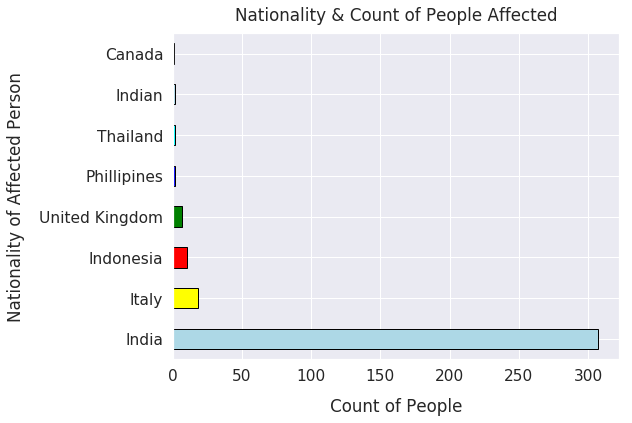

In [81]:
sns.set(font_scale=1.4)
covid_data['Nationality'].value_counts().plot(kind='barh', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);
plt.ylabel("Nationality of Affected Person", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Nationality & Count of People Affected", y=1.02);

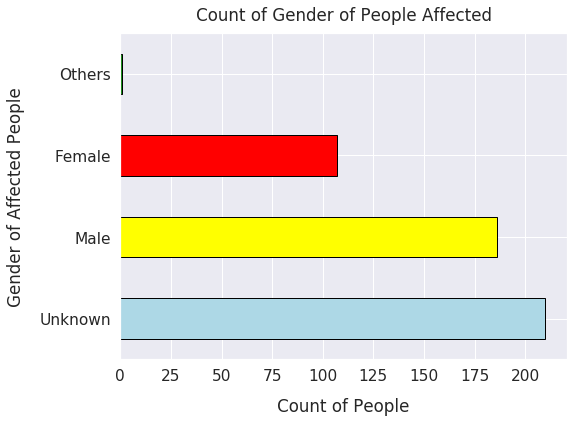

In [90]:
sns.set(font_scale=1.4)
covid_data['Gender'].value_counts().plot(kind='barh', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);

plt.ylabel("Gender of Affected People", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Count of Gender of People Affected", y=1.02);

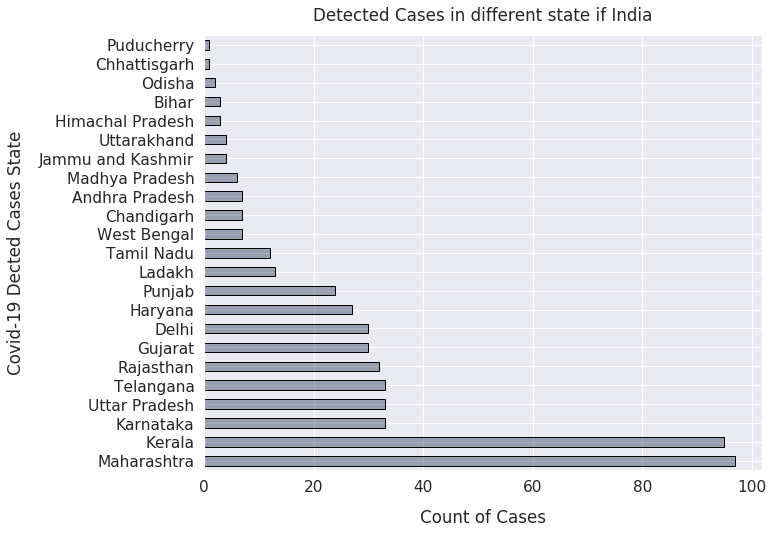

In [97]:
sns.set(font_scale=1.4)
covid_data['Detected state'].value_counts().plot(kind='barh', figsize=(10, 8), edgecolor='black',
                                              color=(0.1, 0.2, 0.3, 0.4));
plt.ylabel("Covid-19 Dected Cases State", labelpad=14)
plt.xlabel("Count of Cases", labelpad=14)
plt.title("Detected Cases in different state if India", y=1.02);

In [111]:
covid_data.Age.describe()

count    249.000000
mean      40.477912
std       17.799752
min        2.000000
25%       25.000000
50%       37.000000
75%       55.000000
max       96.000000
Name: Age, dtype: float64

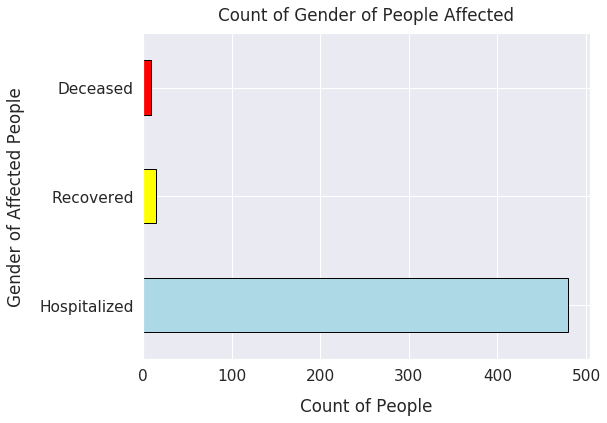

In [112]:
sns.set(font_scale=1.4)
covid_data['Current status'].value_counts().plot(kind='barh', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);

plt.ylabel("Gender of Affected People", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Count of Gender of People Affected", y=1.02);